### Exploratory Data Analysis on Air Quality Dataset
### Regression Analysis to Predict C6H6

| Column Name | Data Type | Description | Units |
| -------- | ------- | -------- | ------- |
| Date | Datetime | Date of Monitoring | ------- |
| Time | Datetime | Time of Monitoring| ------- |
| CO(GT) | Integer | True hourly averaged concentration CO in mg/$m^{3}$ (reference analyzer)  |  mg/$m^{3}$|
| PT08.S1(CO) | Categorical | hourly averaged sensor response (nominally CO targeted) | ------- |
| NMHC(GT) | Integer | True hourly averaged overall Non Metanic HydroCarbons concentration in &micro;g/$m^{3}$ (reference analyzer) | &micro;g/$m^{3}$	 |
| C6H6(GT) | Continuous | True hourly averaged Benzene concentration in &micro;g/m^3 (reference analyzer) | ------- |
| PT08.S2(NMHC) | Categorical | hourly averaged sensor response (nominally NMHC targeted) | ------- |
| NOx(GT)   | Integer | True hourly averaged NOx concentration in ppb (reference analyzer) | ppb |
| PT08.S3(NOx)   | Categorical | hourly averaged sensor response (nominally NOx targeted) | ------- |
| NO2(GT)   | Integer | True hourly averaged NO2 concentration in microg/m^3 (reference analyzer) | &micro;g/$m^{3}$ |
| PT08.S4(NO2)   | Categorical | hourly averaged sensor response (nominally NO2 targeted) | ------- |
| PT08.S5(O3)   | Categorical | hourly averaged sensor response (nominally O3 targeted) | ------- |
| T   | Continuous | Temperature | &deg;C |
| RH  | Continuous | Relative Humidity | % |
| AH   | Continuous | Absolute Humidity | ------- |


In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

color_pal = sns.color_palette()
plt.style.use('ggplot')

In [2]:
plt.rcParams['text.color'] = '#000'

In [3]:
df = pd.read_csv('data/AirQualityUCI.csv',sep=';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


### Data Cleaning

In [4]:
# Remove some unnecessary columns
df = df.drop(['Unnamed: 15','Unnamed: 16'], axis = 1)
df.shape

(9471, 15)

In [5]:
# To combine Date and Time column and set to index
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' +df['Time'].str.replace('.',':'),format= '%d/%m/%Y %H:%M:%S')
df.set_index('Datetime',inplace=True)

# Remove the Date Time since we already have a new index column, Datetime
df = df.drop(['Date','Time'], axis = 1)
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9471 entries, 2004-03-10 18:00:00 to NaT
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   object 
 1   PT08.S1(CO)    9357 non-null   float64
 2   NMHC(GT)       9357 non-null   float64
 3   C6H6(GT)       9357 non-null   object 
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 10  T              9357 non-null   object 
 11  RH             9357 non-null   object 
 12  AH             9357 non-null   object 
dtypes: float64(8), object(5)
memory usage: 1.0+ MB


In [6]:
#Replace , with . since some of the values have wrong formats.
df[['CO(GT)','C6H6(GT)','T','RH','AH']] = df[['CO(GT)','C6H6(GT)','T','RH','AH']].apply\
    (lambda x: x.str.replace(',','.').astype(float))
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Datetime,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-03-10 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-03-10 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-03-10 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-03-10 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [7]:
# Observe null (NaN) values
df.isna().sum()

CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

In this dataset, there are 114 values that are either zero or negative values ( there are a lot of *-200 values* when I checked the raw data). So, we need to manipulate those negative values to ensure a good correlation analysis.

In [8]:
# Observing Null Values and dropping feature with large rows of null values
for col in df.columns: 
    df[col] = df[col].replace(-200,np.nan)   # replace -200 to NaN
    print(col,':',df[col].isna().sum()/len(df)) 
    if df[col][:int(len(df)*0.8)].isna().sum()/int(len(df)*0.8) > 0.5: 
        df.drop(col, axis=1, inplace=True)
    else:
        df[col]: df[col].interpolate(method='linear',limit_direction='both')

CO(GT) : 0.18973709217611656
PT08.S1(CO) : 0.05068102629078239
NMHC(GT) : 0.9034948791046352
C6H6(GT) : 0.05068102629078239
PT08.S2(NMHC) : 0.05068102629078239
NOx(GT) : 0.18509133143279485
PT08.S3(NOx) : 0.05068102629078239
NO2(GT) : 0.18540808784711224
PT08.S4(NO2) : 0.05068102629078239
PT08.S5(O3) : 0.05068102629078239
T : 0.05068102629078239
RH : 0.05068102629078239
AH : 0.05068102629078239


<p style="text-align:justify;">NMHC(GT) column was dropped based on the interpolation since it has a large volumes of outlier that can affect the model. I set the condition of handling null values that if ever there are more than 50% of the first 80% of the dataset (which can represent the train dataset) are classified to be a missing value, we should disregard those feature variable.</p>

In [9]:
# Handling NaN values
df.ffill(inplace=True)

<p style="text-align:justify;">In this part, all values were grouped first based on the Datetime followed by obtaining the mean of those non-null values to replace those NaN values in their group.</p>

### Exploratory Data Analysis

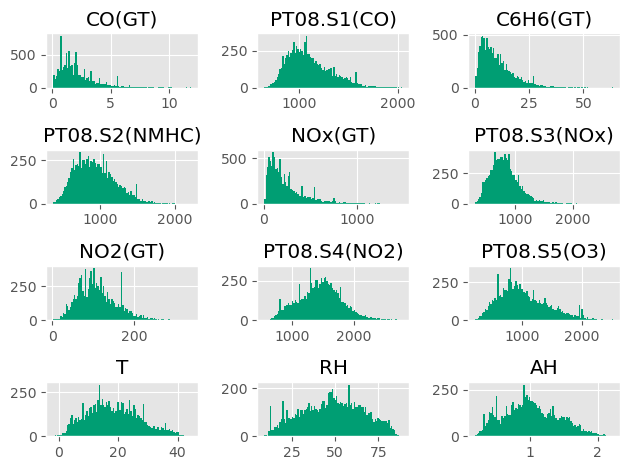

In [10]:
# Histogram for checking the distribution
df.hist(bins=100, color='#009E73')
plt.tight_layout()
plt.show()

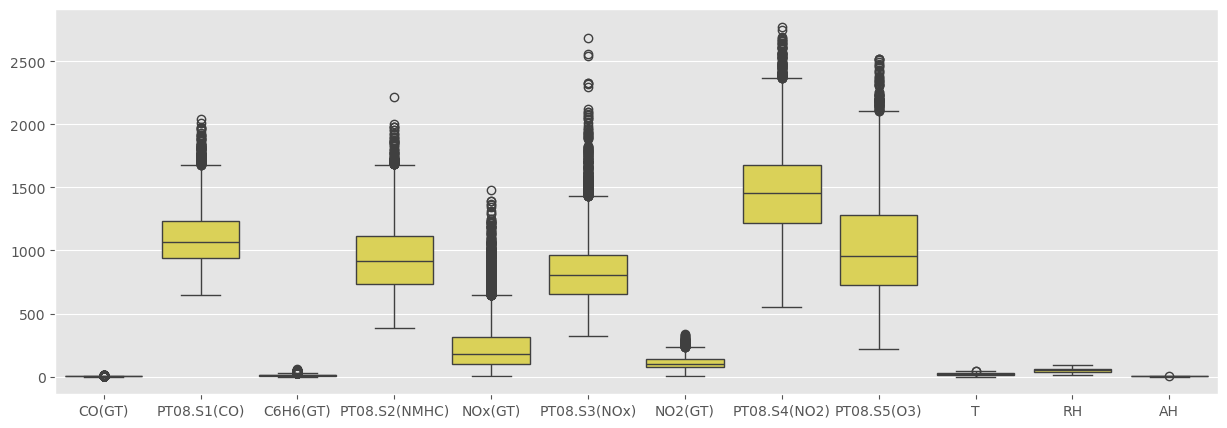

CO(GT)             1.7000
PT08.S1(CO)      295.0000
C6H6(GT)           9.5000
PT08.S2(NMHC)    379.5000
NOx(GT)          218.0000
PT08.S3(NOx)     310.0000
NO2(GT)           65.0000
PT08.S4(NO2)     460.0000
PT08.S5(O3)      552.0000
T                 12.7000
RH                26.8000
AH                 0.5869
dtype: float64


In [11]:
# Boxplot to further identify some outliers
plt.figure(figsize=(15,5))
sns.boxplot(data=df,color='#F0E442')
plt.show()

# Calculate the Interquartile Range (finding the outlier)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
iqr = Q3 - Q1
print(iqr)

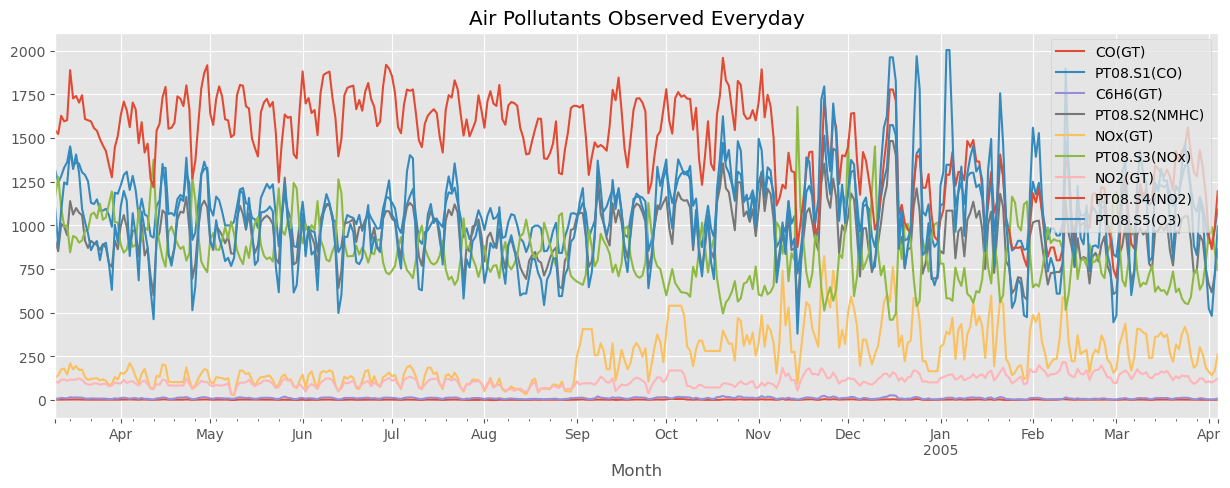

In [12]:
df.drop(['T','RH','AH'],axis=1).resample('D').mean().plot(figsize=(15,5))
plt.xlabel('Month')
plt.title('Air Pollutants Observed Everyday')
plt.show()

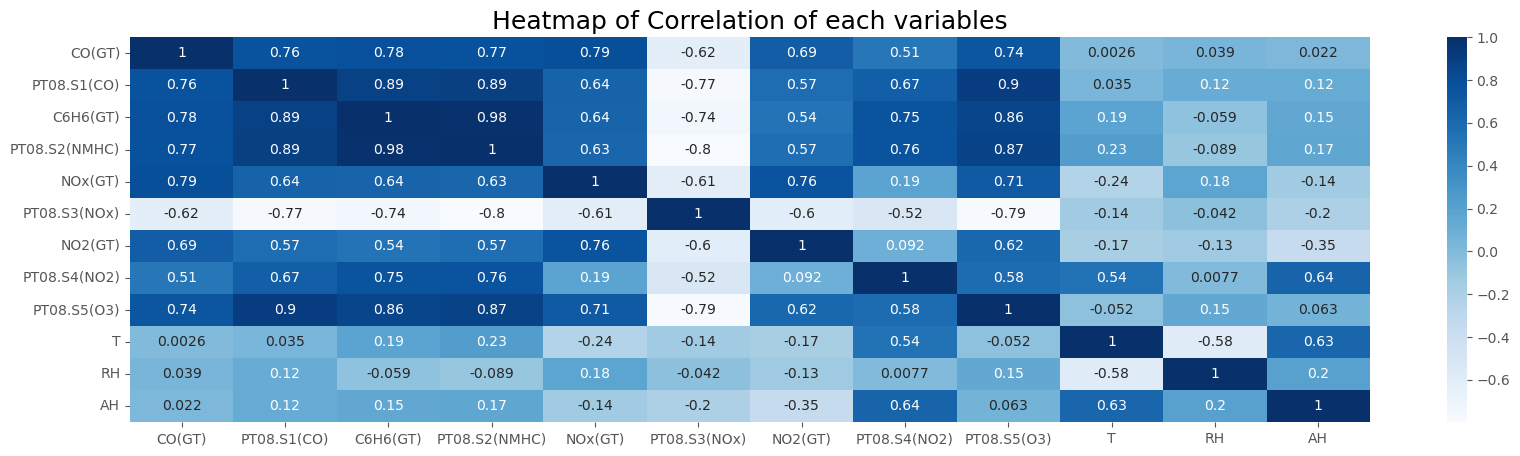

In [13]:
fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(df.corr(),annot=True,cmap='Blues',ax=ax)
plt.title('Heatmap of Correlation of each variables',fontsize=18)
plt.show()

<p style="text-align:justify;">Based on this correlation heatmap, we can observe that PT08S2(NMHC) is highly correlated with C6H6(GT). We may confirm it by building a scatter plot.</p>

In [14]:
# Function to create new features
def create_features(df):
    feat_df = df.copy()
    feat_df['Dew_Point'] = feat_df['T'] - ((100-feat_df['RH'])/5)
    return feat_df

df = create_features(df).drop(['T','RH'],axis=1)

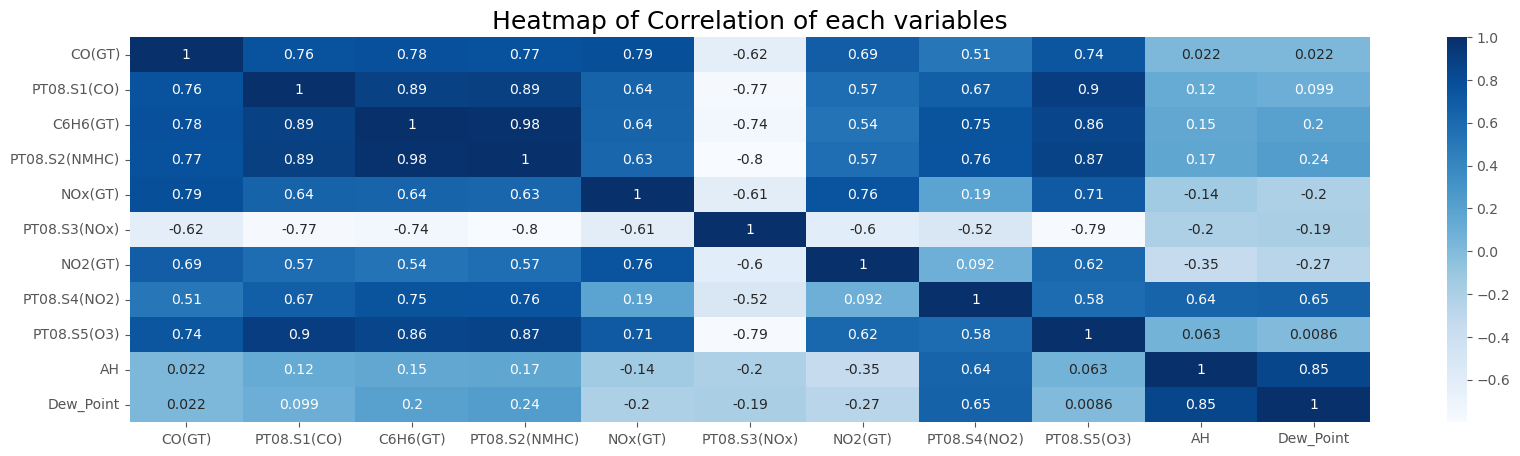

In [15]:
fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(df.corr(),annot=True,cmap='Blues',ax=ax)
plt.title('Heatmap of Correlation of each variables',fontsize=18)
plt.show()

Separating feature variables with our target variable (NOx concentration)

### Lasso Regression Analysis

In [ ]:
# Predicting values
y_pred_ridge=ridge.predict(X_test)
y_pred_ridge

array([473.28279664, 378.61278902, 323.90866556, ..., 149.45233413,
       276.49460209, 637.15901526])

In [ ]:
# Creating a dataframe combining the actual and predicted NOx concentration
y_pred_ridge = pd.Series(y_pred, name='Predicted NOx')

actual_and_pred_2 = pd.concat([y_test.reset_index(drop=True),y_pred_lm],axis=1)
actual_and_pred_2.rename(columns={'NOx(GT)':'Actual NOx'},inplace=True)
actual_and_pred_2.set_index(y_test.index,inplace=True)
actual_and_pred_2

,Actual NOx,Predicted NOx
Datetime,,
2005-03-24 11:00:00,653.0,212.413416
2004-11-01 16:00:00,376.0,169.996937
2005-04-04 14:00:00,265.0,78.169249
NaT,265.0,181.029116
2004-08-14 18:00:00,40.0,201.395332
...,...,...
2005-03-21 21:00:00,433.0,-32.497487
2005-02-16 19:00:00,433.0,-10.169492
2004-11-04 02:00:00,140.0,12.320248
